In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../../../../../datasets/paris_listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})
df['위도']=raw['latitude']
df['경도']=raw['longitude']
print(len(df[df['리뷰수']==0]))
# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")

# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

df_guest_prefer= df[(df['리뷰점수'] >= 4.9) & (df['리뷰수'] >= 5) & (df['슈퍼호스트'] == 't')]
df_non_guest_prefer = df[(df['슈퍼호스트'] == 'f') & (df['리뷰수'] >= 5)].sort_values('리뷰점수', ascending=True).head(4716)

25576
처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


# 각 요소
- 처음 6000개
- 줄여야함
- 돌리는데만 2시간걸림 이렇게 할바엔 랜덤 개수만큼만

In [2]:
# 모든 편의시설을 파싱하여 유니크한 편의시설 세트 생성
amenities_set = set()
amenities_set1 = set()
df_guest_prefer['편의시설'].apply(lambda x: amenities_set.update(eval(x)))
df_non_guest_prefer['편의시설'].apply(lambda x: amenities_set1.update(eval(x)))

# 각 편의시설에 대해 이진 특성 열을 데이터프레임에 추가
for amenity in amenities_set:
    df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))

for amenity in amenities_set1:
    df_non_guest_prefer[amenity] = df_non_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
    
# '편의시설' 열 삭제
df_guest_prefer.drop('편의시설', axis=1, inplace=True)
df_non_guest_prefer.drop('편의시설', axis=1, inplace=True)

C:\Users\ciw96\AppData\Local\Temp\ipykernel_5652\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
C:\Users\ciw96\AppData\Local\Temp\ipykernel_5652\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
C:\Users\ciw96\AppData\Local\Temp\ipykernel_5652\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be se

KeyboardInterrupt: 

In [ ]:
df_guest_prefer.to_csv('../../../../../datasets/paris_prefer.csv',index=False)
df_non_guest_prefer.to_csv('../../../../../datasets/paris_non_prefer.csv',index=False)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

df_guest_prefer = pd.read_csv('../../../../../datasets/paris_prefer.csv')
df_non_guest_prefer= pd.read_csv('../../../../../datasets/paris_non_prefer.csv')

In [4]:
# 모든 열 이름을 소문자로 변환하여 찾기
tv_columns = [col for col in df_guest_prefer.columns if 'tv' in col.lower()]
wifi_columns = [col for col in df_guest_prefer.columns if 'wifi' in col.lower()]
shampoo_columns = [
    col for col in df_guest_prefer.columns if 'body soap' in col.lower() or 'shampoo' in col.lower() or 'conditioner' in col.lower()
]
oven_columns = [col for col in df_guest_prefer.columns if 'oven' in col.lower()]
stove_columns = [col for col in df_guest_prefer.columns if 'stove' in col.lower()]
housekeeping_columns = [col for col in df_guest_prefer.columns if 'housekeeping' in col.lower()]
sound_columns = [col for col in df_guest_prefer.columns if 'sound' in col.lower()]
refrigerator_columns = [col for col in df_guest_prefer.columns if 'refrigerator' in col.lower()]
parking_columns = [col for col in df_guest_prefer.columns if 'parking' in col.lower()]
weights_columns = [
    col for col in df_guest_prefer.columns if 'weights' in col.lower() or 'exercise' in col.lower() or 'gym' in col.lower()
]
game_columns = [col for col in df_guest_prefer.columns if 'game' in col.lower() ]
coffee_columns = [col for col in df_guest_prefer.columns if 'coffee' in col.lower() ]
pool_columns = [col for col in df_guest_prefer.columns if 'pool' in col.lower() ]

# 개수 확인
print(f"tv_columns  개수 : {len(tv_columns)}")
print(f"wifi_columns  개수 : {len(wifi_columns)}")
print(f"shampoo_columns  개수 : {len(shampoo_columns)}")
print(f"oven_columns  개수 : {len(oven_columns)}")
print(f"stove_columns  개수 : {len(stove_columns)}")
print(f"housekeeping_columns  개수 : {len(housekeeping_columns)}")
print(f"sound_columns  개수 : {len(sound_columns)}")
print(f"refrigerator_columns  개수 : {len(refrigerator_columns)}")
print(f"parking_columns  개수 : {len(parking_columns)}")
print(f"weights_columns  개수 : {len(weights_columns)}")
print(f"game_columns  개수 : {len(game_columns)}")
print(f"coffee_columns  개수 : {len(coffee_columns)}")
print(f"pool_columns  개수 : {len(pool_columns)}")

# 하나의  열 생성
df_guest_prefer['tv'] = df_guest_prefer[tv_columns].any(axis=1)
df_guest_prefer['wifi'] = df_guest_prefer[wifi_columns].any(axis=1)
df_guest_prefer['shampoo'] = df_guest_prefer[shampoo_columns].any(axis=1)
df_guest_prefer['oven'] = df_guest_prefer[oven_columns].any(axis=1)
df_guest_prefer['stove'] = df_guest_prefer[stove_columns].any(axis=1)
df_guest_prefer['housekeeping'] = df_guest_prefer[housekeeping_columns].any(axis=1)
df_guest_prefer['sound'] = df_guest_prefer[sound_columns].any(axis=1)
df_guest_prefer['refrigerator'] = df_guest_prefer[refrigerator_columns].any(axis=1)
df_guest_prefer['parking'] = df_guest_prefer[parking_columns].any(axis=1)
df_guest_prefer['weights'] = df_guest_prefer[weights_columns].any(axis=1)
df_guest_prefer['game'] = df_guest_prefer[game_columns].any(axis=1)
df_guest_prefer['coffee'] = df_guest_prefer[coffee_columns].any(axis=1)
df_guest_prefer['pool'] = df_guest_prefer[pool_columns].any(axis=1)



# 모든 열 리스트를 하나로 합치기
all_columns_to_drop = tv_columns + wifi_columns + shampoo_columns + oven_columns + stove_columns + housekeeping_columns + sound_columns + refrigerator_columns + parking_columns + weights_columns + game_columns + coffee_columns + pool_columns

# 리스트에서 중복 제거
columns_to_drop = list(set(all_columns_to_drop))

# 일괄 삭제
df_guest_prefer.drop(columns=columns_to_drop, inplace=True)


tv_columns  개수 : 629
wifi_columns  개수 : 491
shampoo_columns  개수 : 614
oven_columns  개수 : 222
stove_columns  개수 : 135
housekeeping_columns  개수 : 19
sound_columns  개수 : 255
refrigerator_columns  개수 : 145
parking_columns  개수 : 32
weights_columns  개수 : 25
game_columns  개수 : 19
coffee_columns  개수 : 35
pool_columns  개수 : 36


In [5]:
# 모든 열 이름을 소문자로 변환하여 찾기
tv_columns = [col for col in df_non_guest_prefer.columns if 'tv' in col.lower()]
wifi_columns = [col for col in df_non_guest_prefer.columns if 'wifi' in col.lower()]
shampoo_columns = [
    col for col in df_non_guest_prefer.columns if 'body soap' in col.lower() or 'shampoo' in col.lower() or 'conditioner' in col.lower()
]
oven_columns = [col for col in df_non_guest_prefer.columns if 'oven' in col.lower()]
stove_columns = [col for col in df_non_guest_prefer.columns if 'stove' in col.lower()]
housekeeping_columns = [col for col in df_non_guest_prefer.columns if 'housekeeping' in col.lower()]
sound_columns = [col for col in df_non_guest_prefer.columns if 'sound' in col.lower()]
refrigerator_columns = [col for col in df_non_guest_prefer.columns if 'refrigerator' in col.lower()]
parking_columns = [col for col in df_non_guest_prefer.columns if 'parking' in col.lower()]
weights_columns = [
    col for col in df_non_guest_prefer.columns if 'weights' in col.lower() or 'exercise' in col.lower() or 'gym' in col.lower()
]
game_columns = [col for col in df_non_guest_prefer.columns if 'game' in col.lower() ]
coffee_columns = [col for col in df_non_guest_prefer.columns if 'coffee' in col.lower() ]
pool_columns = [col for col in df_non_guest_prefer.columns if 'pool' in col.lower() ]

# 개수 확인
print(f"tv_columns  개수 : {len(tv_columns)}")
print(f"wifi_columns  개수 : {len(wifi_columns)}")
print(f"shampoo_columns  개수 : {len(shampoo_columns)}")
print(f"oven_columns  개수 : {len(oven_columns)}")
print(f"stove_columns  개수 : {len(stove_columns)}")
print(f"housekeeping_columns  개수 : {len(housekeeping_columns)}")
print(f"sound_columns  개수 : {len(sound_columns)}")
print(f"refrigerator_columns  개수 : {len(refrigerator_columns)}")
print(f"parking_columns  개수 : {len(parking_columns)}")
print(f"weights_columns  개수 : {len(weights_columns)}")
print(f"game_columns  개수 : {len(game_columns)}")
print(f"coffee_columns  개수 : {len(coffee_columns)}")
print(f"pool_columns  개수 : {len(pool_columns)}")

# 하나의  열 생성
df_non_guest_prefer['tv'] = df_non_guest_prefer[tv_columns].any(axis=1)
df_non_guest_prefer['wifi'] = df_non_guest_prefer[wifi_columns].any(axis=1)
df_non_guest_prefer['shampoo'] = df_non_guest_prefer[shampoo_columns].any(axis=1)
df_non_guest_prefer['oven'] = df_non_guest_prefer[oven_columns].any(axis=1)
df_non_guest_prefer['stove'] = df_non_guest_prefer[stove_columns].any(axis=1)
df_non_guest_prefer['housekeeping'] = df_non_guest_prefer[housekeeping_columns].any(axis=1)
df_non_guest_prefer['sound'] = df_non_guest_prefer[sound_columns].any(axis=1)
df_non_guest_prefer['refrigerator'] = df_non_guest_prefer[refrigerator_columns].any(axis=1)
df_non_guest_prefer['parking'] = df_non_guest_prefer[parking_columns].any(axis=1)
df_non_guest_prefer['weights'] = df_non_guest_prefer[weights_columns].any(axis=1)
df_non_guest_prefer['game'] = df_non_guest_prefer[game_columns].any(axis=1)
df_non_guest_prefer['coffee'] = df_non_guest_prefer[coffee_columns].any(axis=1)
df_non_guest_prefer['pool'] = df_non_guest_prefer[pool_columns].any(axis=1)



# 모든 열 리스트를 하나로 합치기
all_columns_to_drop = tv_columns + wifi_columns + shampoo_columns + oven_columns + stove_columns + housekeeping_columns + sound_columns + refrigerator_columns + parking_columns + weights_columns + game_columns + coffee_columns + pool_columns

# 리스트에서 중복 제거
columns_to_drop = list(set(all_columns_to_drop))

# 일괄 삭제
df_non_guest_prefer.drop(columns=columns_to_drop, inplace=True)


print(df)

tv_columns  개수 : 237
wifi_columns  개수 : 151
shampoo_columns  개수 : 202
oven_columns  개수 : 69
stove_columns  개수 : 54
housekeeping_columns  개수 : 7
sound_columns  개수 : 61
refrigerator_columns  개수 : 68
parking_columns  개수 : 24
weights_columns  개수 : 14
game_columns  개수 : 17
coffee_columns  개수 : 25
pool_columns  개수 : 20


NameError: name 'df' is not defined

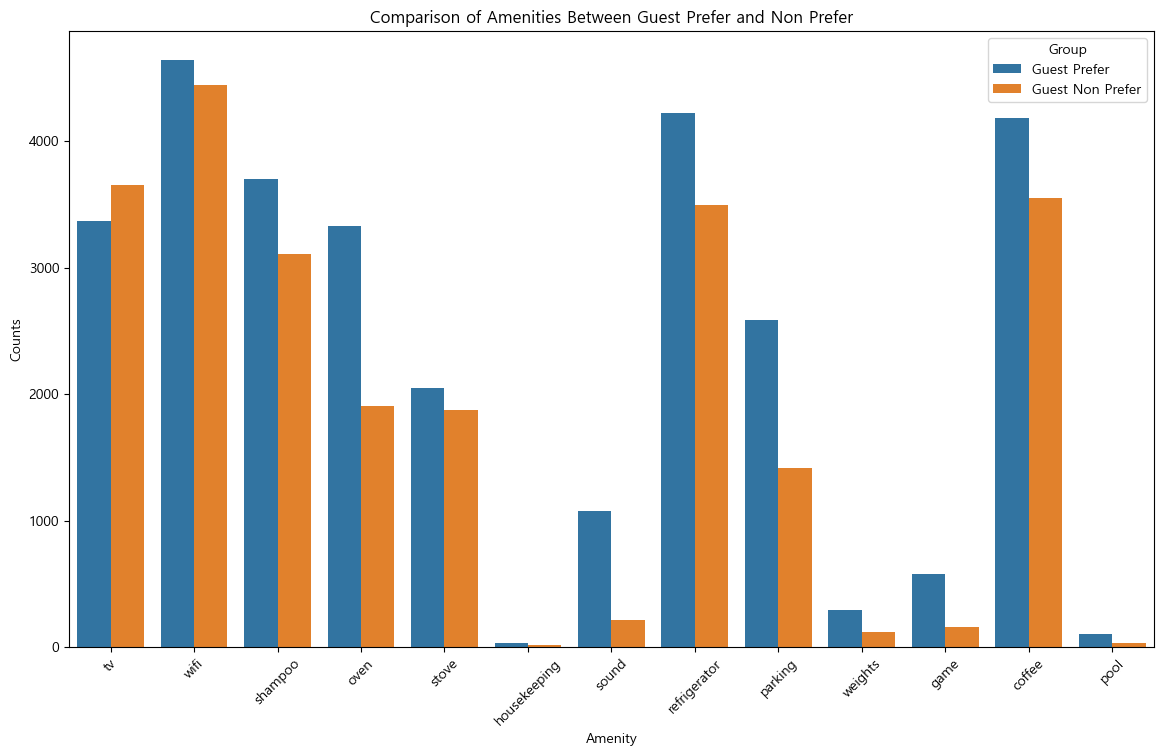

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 편의시설 요소 목록
amenities = ['tv', 'wifi', 'shampoo', 'oven', 'stove', 'housekeeping', 'sound', 'refrigerator', 'parking', 'weights', 'game', 'coffee', 'pool']

# 각 데이터프레임에 대해 편의시설의 True 개수를 계산하고 비교
results = []

for amenity in amenities:
    prefer_count = df_guest_prefer[amenity].sum()
    non_prefer_count = df_non_guest_prefer[amenity].sum()
    results.append({
        'Amenity': amenity,
        'Guest Prefer': prefer_count,
        'Guest Non Prefer': non_prefer_count
    })

# 결과 DataFrame 생성
comparison_df = pd.DataFrame(results)
comparison_df_melted = comparison_df.melt(id_vars='Amenity', value_vars=['Guest Prefer', 'Guest Non Prefer'], var_name='Type', value_name='Counts')

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='Amenity', y='Counts', hue='Type', data=comparison_df_melted)

plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Comparison of Amenities Between Guest Prefer and Non Prefer')
plt.legend(title='Group')
plt.show()


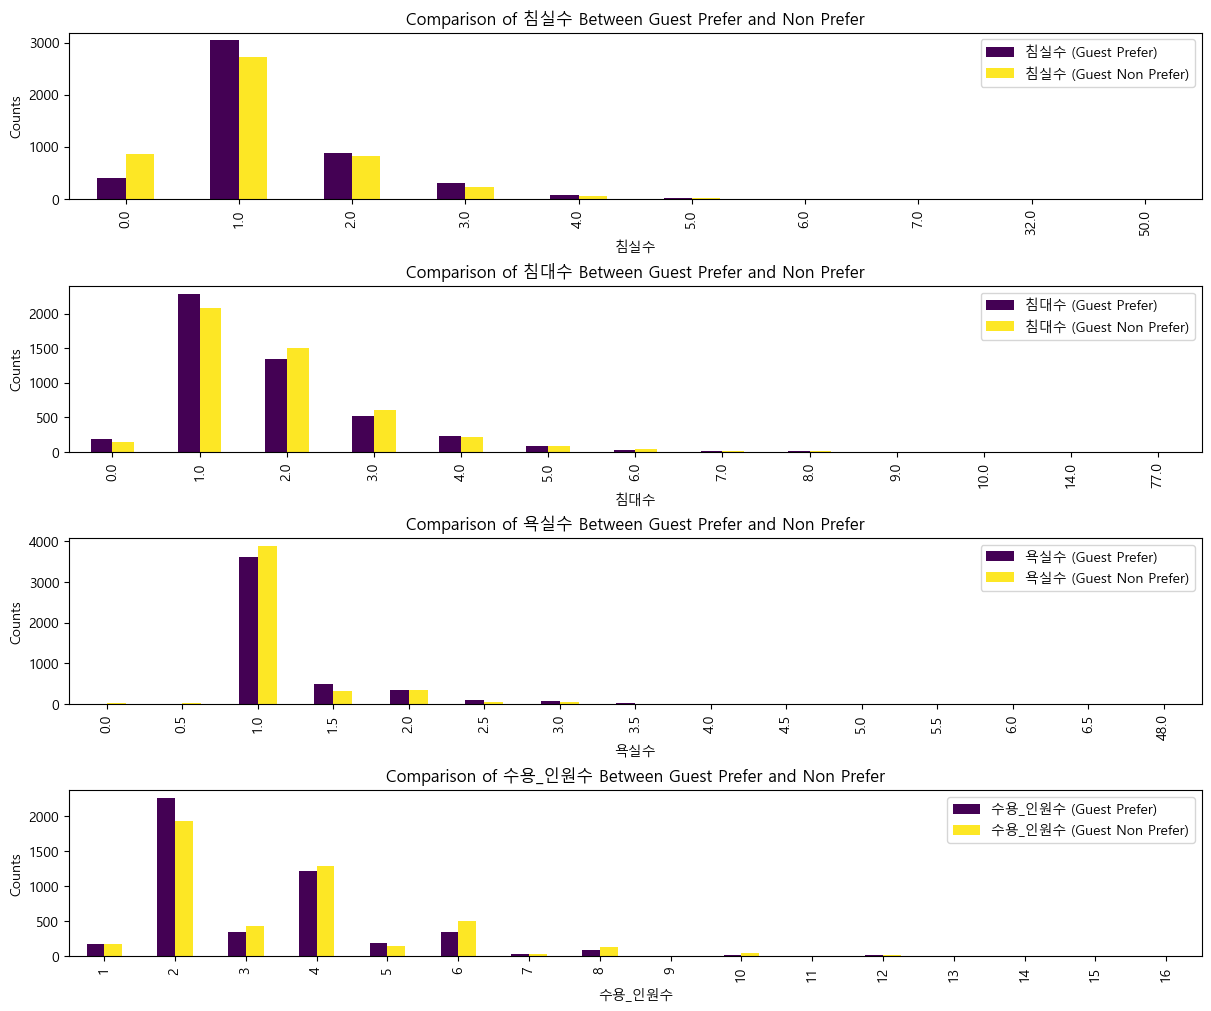

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 관련 열 선택
relevant_columns = ['침실수','침대수', '욕실수', '수용_인원수']

# 결과 저장을 위한 리스트
results = []

# df_guest_prefer와 df_guest_non_prefer에서 각 열의 개수를 카운트
for col in relevant_columns:
    # Guest Prefer
    prefer_counts = df_guest_prefer[col].value_counts().sort_index()
    # Guest Non Prefer
    non_prefer_counts = df_non_guest_prefer[col].value_counts().sort_index()

    # 결과 데이터프레임 생성
    df_prefer = pd.DataFrame({f'{col} (Guest Prefer)': prefer_counts})
    df_non_prefer = pd.DataFrame({f'{col} (Guest Non Prefer)': non_prefer_counts})
    df_combined = pd.merge(df_prefer, df_non_prefer, left_index=True, right_index=True, how='outer').fillna(0)
    results.append(df_combined)

# 결과 시각화
fig, axes = plt.subplots(nrows=len(relevant_columns), figsize=(12, 10), constrained_layout=True)

for i, df in enumerate(results):
    ax = axes[i] if len(relevant_columns) > 1 else axes
    df.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title(f'Comparison of {relevant_columns[i]} Between Guest Prefer and Non Prefer')
    ax.set_xlabel(relevant_columns[i])
    ax.set_ylabel('Counts')
    ax.legend()

plt.show()


In [8]:
df_guest_prefer['침실수'].unique()

array([1., 0., 2., 3., 4., 5., 7., 6.])

In [9]:
df_non_guest_prefer['침실수'].unique()

array([ 1.,  0.,  2.,  5.,  3.,  4.,  7.,  6., 32., 50.])

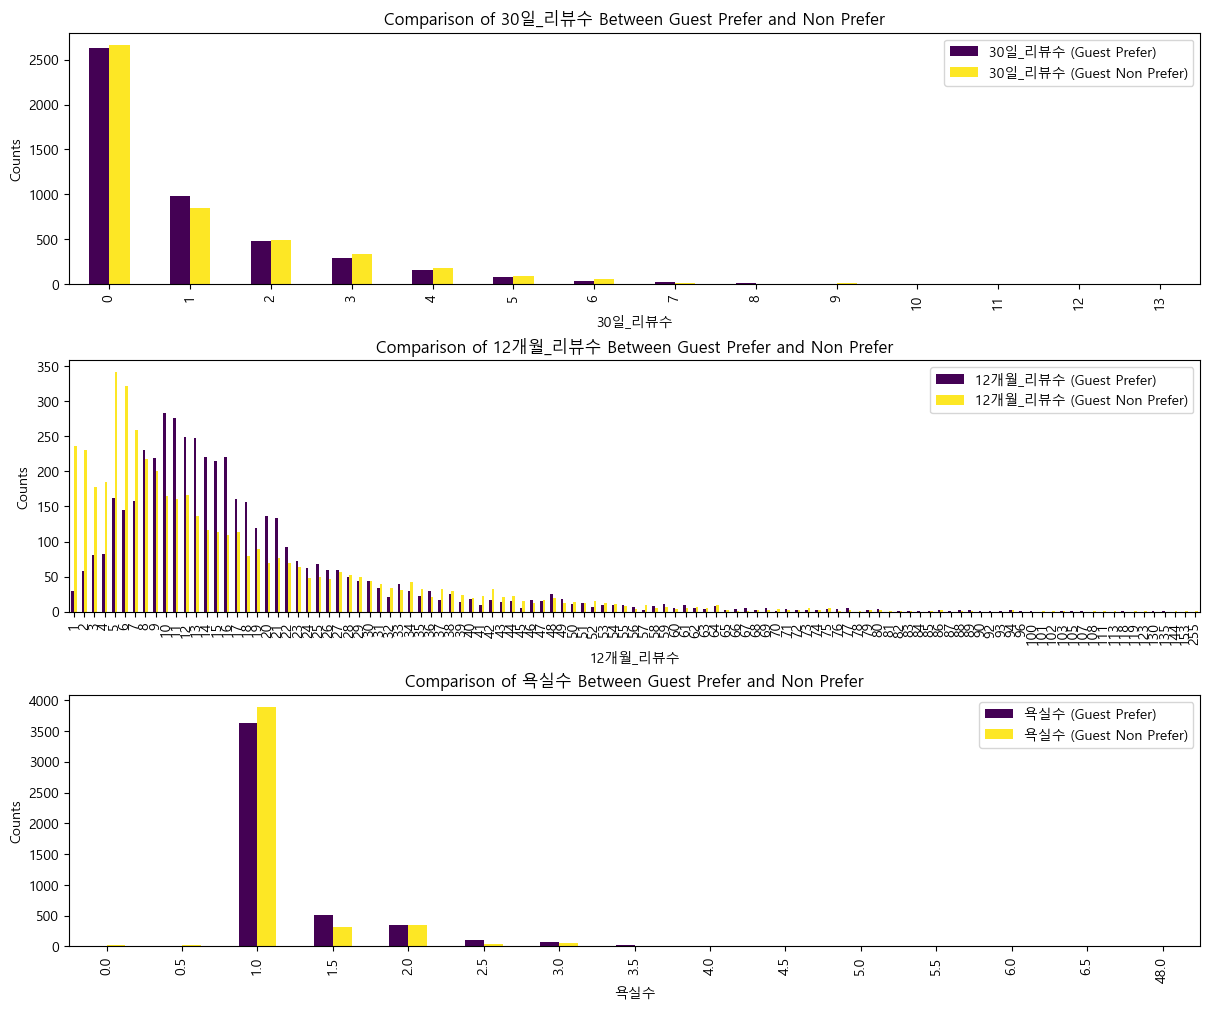

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 관련 열 선택
relevant_columns = ['30일_리뷰수','12개월_리뷰수', '욕실수']

# 결과 저장을 위한 리스트
results = []

# df_guest_prefer와 df_guest_non_prefer에서 각 열의 개수를 카운트
for col in relevant_columns:
    # Guest Prefer
    prefer_counts = df_guest_prefer[col].value_counts().sort_index()
    # Guest Non Prefer
    non_prefer_counts = df_non_guest_prefer[col].value_counts().sort_index()

    # 결과 데이터프레임 생성
    df_prefer = pd.DataFrame({f'{col} (Guest Prefer)': prefer_counts})
    df_non_prefer = pd.DataFrame({f'{col} (Guest Non Prefer)': non_prefer_counts})
    df_combined = pd.merge(df_prefer, df_non_prefer, left_index=True, right_index=True, how='outer').fillna(0)
    results.append(df_combined)

# 결과 시각화
fig, axes = plt.subplots(nrows=len(relevant_columns), figsize=(12, 10), constrained_layout=True)

for i, df in enumerate(results):
    ax = axes[i] if len(relevant_columns) > 1 else axes
    df.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title(f'Comparison of {relevant_columns[i]} Between Guest Prefer and Non Prefer')
    ax.set_xlabel(relevant_columns[i])
    ax.set_ylabel('Counts')
    ax.legend()

plt.show()


In [11]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


# 이거 렉 너무걸림

# 런던 확인해주세요